# Finding Feasible Counterfactual Explanations (FCX)

Feasible Counterfactual Explanations (FCX) is a novel framework that generates realistic and low-cost counterfactuals by enforcing both hard feasibility constraints provided by domain experts and soft causal constraints inferred from data. Built on a modified Variational Autoencoder and optimized with a multi-factor loss function, FCX produces sparse, diverse, and actionable counterfactuals while preserving causal relationships, offering both individual-level explanations and global model feasibility assessments across multiple datasets.

### Adult Dataset Example

This notebook demonstrates preparation, training, and evaluation of the FCX models  
specifically for the **Adult** dataset.  
We will:
1. Unpack the preprocessed data  
2. (Optional) Fine‑tune the black‑box model  
3. Train the unary and binary counterfactual generators  
4. Evaluate the trained generators  

In [ ]:
# Unzip the Adult dataset archive
#!7z x data.7z -o ./data


Load paths

In [1]:
import sys, os
import importlib.util
exp_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain'))
sys.path.insert(0, exp_dir)

fcx_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain','fcx'))
sys.path.insert(0, fcx_dir)

# compute absolute path to the `scripts` folder
scripts_dir = os.path.abspath(
    os.path.join('..', '..', 'humancompatible', 'explain', 'fcx', 'scripts')
)
sys.path.append(scripts_dir)
# 1) Compute the full path to your script
script_path = os.path.abspath(
    os.path.join('..','..','humancompatible','explain','fcx','scripts','blackbox-model-train.py')
)
# 2) Create a module spec and module object
spec = importlib.util.spec_from_file_location("blackbox_model_train", script_path)
bb_mod = importlib.util.module_from_spec(spec)

# 3) Execute the module in its own namespace
spec.loader.exec_module(bb_mod)

# 4) Extract the function
train_blackbox = bb_mod.train_blackbox

## 1. (Optional) Fine‑tune the black‑box model for Adult

Run this first if the provided checkpoint isn’t compatible.

In [ ]:


# Fine-tune/load the black‑box model
train_blackbox('adult')

## 2. Train FCX on the Adult dataset

Next, we train the **unary** generator, then the **binary** generator.

In [ ]:

from FCX_binary_generation_adult import train_binary_fcx_vae
#!pip install networkx==2.8
# Call it for the Adult dataset
train_binary_fcx_vae(
    'adult',
    base_data_dir='../../data/',
    base_model_dir='../models/',
    batch_size=2048, #2048
    epochs=25, #50
    validity=76.0,
    feasibility=147.0,
    margin=0.344
)

## 3. Evaluate the trained models (Adult)

Run evaluation scripts to compute validity and feasibility metrics.

{9: 0, 12: 0, 7: 1, 6: 1, 13: 1, 10: 2, 11: 2, 8: 3}
   age      workclass  education marital_status    occupation   race  gender  \
0   39     Government  Bachelors         Single  White-Collar  White    Male   
1   50  Self-Employed  Bachelors        Married  White-Collar  White    Male   
2   38        Private    HS-grad       Divorced   Blue-Collar  White    Male   
3   53        Private     School        Married   Blue-Collar  Other    Male   
4   28        Private  Bachelors        Married  Professional  Other  Female   

   hours_per_week  income  
0              40       0  
1              13       0  
2              40       0  
3              40       0  
4              40       0  
   age      workclass  education marital_status    occupation   race  gender  \
0   39     Government  Bachelors         Single  White-Collar  White    Male   
1   50  Self-Employed  Bachelors        Married  White-Collar  White    Male   
2   38        Private    HS-grad       Divorced   Blue-Col

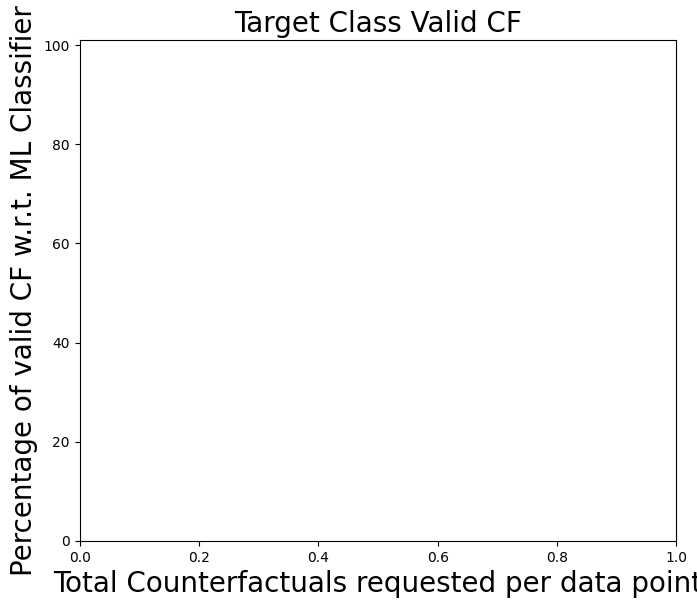

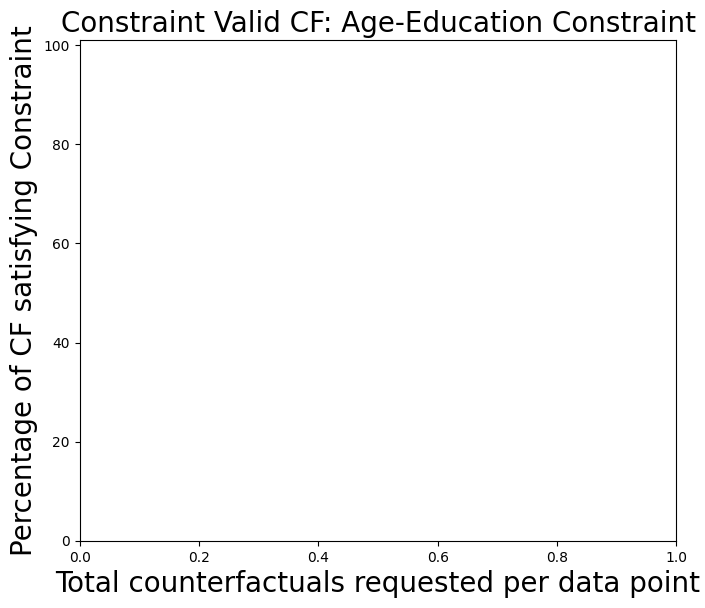

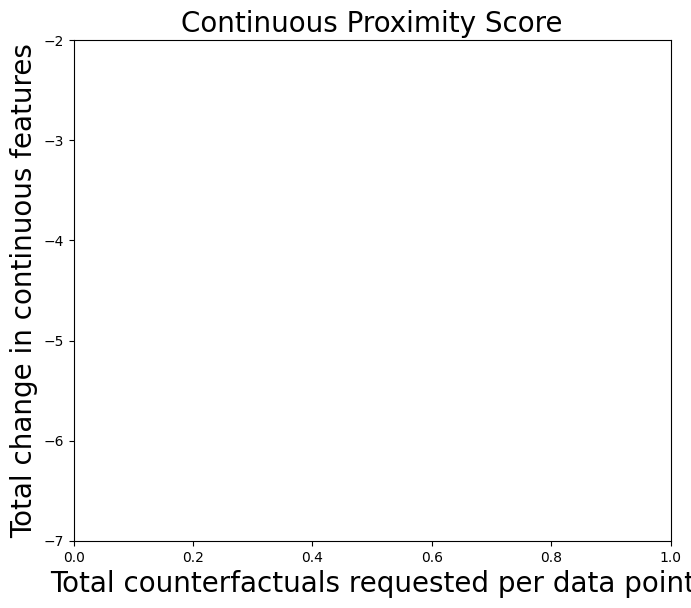

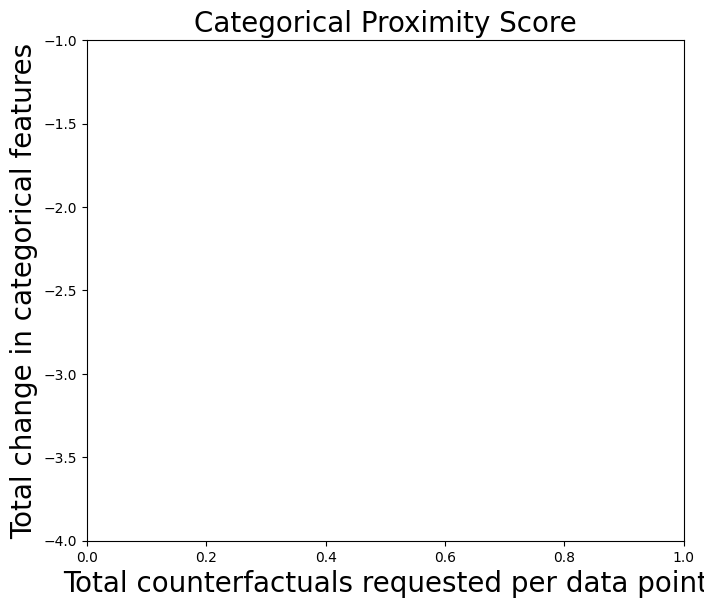

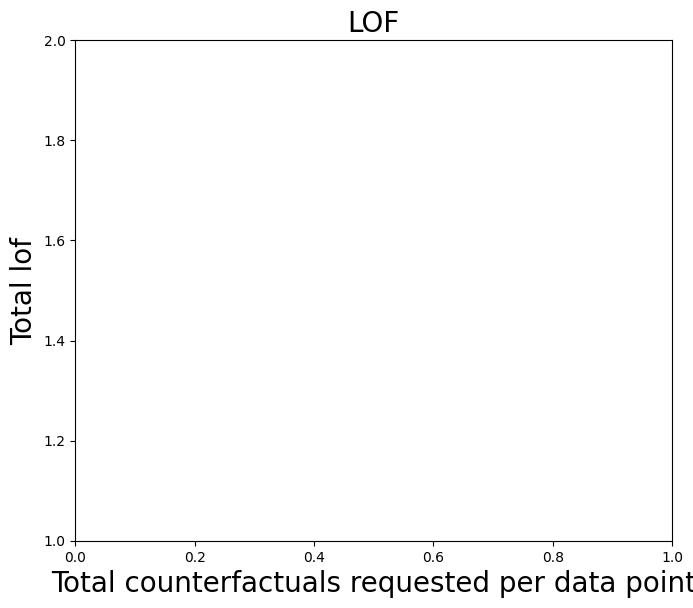

In [ ]:

from evaluate_binary_adult import evaluate_adult
import warnings
warnings.filterwarnings("ignore")
res = evaluate_adult(
    base_data_dir='../../data/',
    base_model_dir='../models/',
    dataset_name='adult',
    pth_name = 'adult-margin-0.344-feasibility-147.0-validity-76.0-epoch-25-fcx-binary.pth'
)
print(res)

Read the results from csv files